# Predição dos fatores responsáveis pelas Doenças CardioVasculares usando Machine Learning
As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo.

A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 recursos que podem ser usados ​​para prever a mortalidade por insuficiência cardíaca.

A maioria das doenças cardiovasculares pode ser prevenida abordando os fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, sedentarismo e uso prejudicial de álcool, usando estratégias para toda a população.

Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, em que um modelo de aprendizado de máquina pode ser de grande ajuda .

Neste projeto, vamos predizer quais os diferentes fatores responsáveis ​​pela Insuficiência Cardíaca.
Vamos começar importando as bibliotecas que precisaremos para este projeto.

Fonte do conjunto de dados: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

As seguintes variáveis ​​estão presentes neste conjunto de dados:

* age - idade do paciente
* anaemia - Diminuição de glóbulos vermelhos ou hemoglobina (booleano)
* creatinine_phosphokinase - Nível da enzima CPK no sangue (mcg / L)
* diabetes - Se o paciente tem diabetes (booleano)
* ejection_fraction - Porcentagem de sangue saindo do coração a cada contração (porcentagem) 
* high_blood_pressure -Se o paciente tem hipertensão (booleano)
* platelets - Plaquetas no sangue (quiloplacas / mL)
* serum_creatinine - Nível de creatinina sérica no sangue (mg / dL)
* serum_sodium - Nível de sódio sérico no sangue (mEq / L)
* sex - Mulher ou homem (binário)
* smoking -Se o paciente fuma ou não (booleano)
* time -nPeríodo de acompanhamento (dias)
* DEATH_EVENT - Se o paciente faleceu durante o período de acompanhamento (booleano)

# Preparação de dados
É aqui que garantimos que os dados estão "limpos" e não causarão problemas ou resultados inesperados devido a valores ausentes, valores duplicados, tipo de dados errado, outliers, etc.

In [ ]:
# carregando bibliotecas e personalizando configurações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max.columns', None)

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

In [ ]:
# carregando e visualizando conjunto de dados
df = pd.read_csv ('/content/drive/MyDrive/Projetos Data Science /cardio_dados/heart_failure_clinical_records_dataset.csv')
df.sample (5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
105,72.0,1,328,0,30,1,621000.0,1.7,138,0,1,88,1
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,0,215,0
279,55.0,0,84,1,38,0,451000.0,1.3,136,0,0,246,0
246,55.0,0,2017,0,25,0,314000.0,1.1,138,1,0,214,1
258,45.0,1,66,1,25,0,233000.0,0.8,135,1,0,230,0


In [ ]:
# verificar as informações básicas do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Este conjunto de dados possui 299 registros e 13 variáveis, das quais a última, 'DEATH_EVENT', é a variável de destino. Também podemos ver que não há valores ausentes.

In [ ]:
# verificação de registros duplicados 
df.duplicated().any()

False

In [ ]:
# verificar os valores para garantir que não haja anomalias
columns = list(df.columns)

for column in columns:
    print("Variável de exploração: {}".format(column))
    print("Número de valores: {}".format(df[column].nunique()))
    print(df[column].unique())
    print()

Variável de exploração: age
Número de valores: 47
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]

Variável de exploração: anaemia
Número de valores: 2
[0 1]

Variável de exploração: creatinine_phosphokinase
Número de valores: 208
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  2

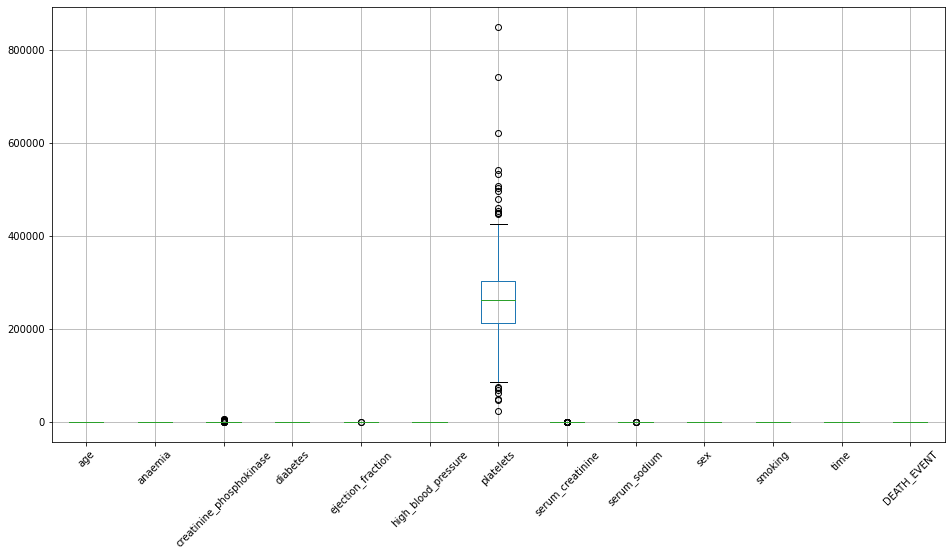

In [ ]:
plt.figure(figsize = (16, 8))
df.boxplot(columns)
plt.xticks(rotation = 45)
plt.show()

A variável 'plaquetas' (platelets) tem muitos outliers. Isso afetará os algoritmos de classificação, como regressão logística, que são altamente suscetíveis a outliers.

# Análise exploratória de dados
Isso é feito para entender melhor nossos dados para que possamos saber qual algoritmo seria apropriado para eles.

In [ ]:
# visualizar os resumos das estatísticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Nas estatísticas em resumo acima, podemos ver que algumas variáveis ​​citaram uma ampla gama de valores, como 'creatinine_phosphokinase' (23-7861), 'platelets' (25100-850000) e assim por diante. Isso pode ser bastante problemático, pois o algoritmo ou algoritmos de aprendizado de máquina assumirão que valores maiores têm mais peso, ou seja, são mais importantes. Portanto, precisaremos padronizar os recursos antes de realizar a modelagem.

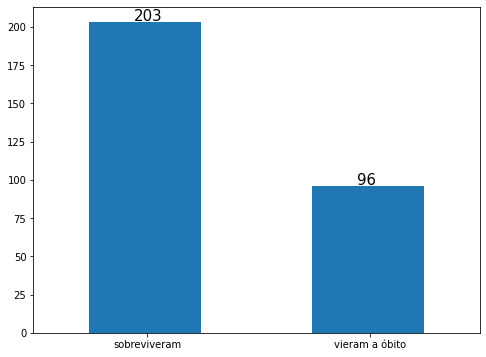

In [ ]:
# distribuição de pacientes que vieram a óbito
ax = df.DEATH_EVENT.value_counts().plot(kind = 'bar', rot = 0)
for i in ax.patches:
    ax.text(i.get_x() + 0.2, i.get_height() + 1, 
           str(round(i.get_height(), 2)), fontsize = 15)
    
plt.xticks(ticks = [0.01, 1.01], labels = ['sobreviveram', 'vieram a óbito'])
plt.show()

**Este conjunto de dados é desequilibrado, pois há muito mais pacientes que não morreram em comparação com aqueles que morreram.**

In [ ]:
# distribuição por idade
df.groupby('DEATH_EVENT').age.describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
1,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


Dos pacientes que morreram, suas idades variaram de 42 a 95 anos, enquanto aqueles que não morreram estavam entre 40-90 anos. Além disso, aqueles que morreram tinham uma média de idade mais elevada do que aqueles que sobreviveram.

In [ ]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

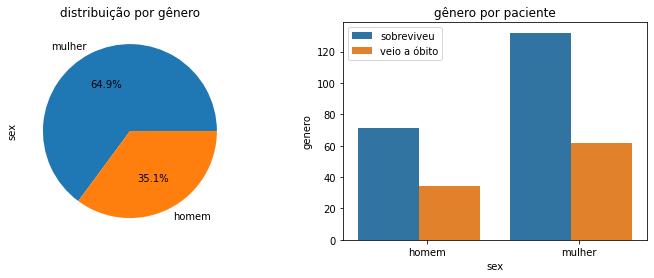

In [ ]:
# distribuição por gênero
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
df.sex.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = ['mulher', 'homem'])
plt.title('distribuição por gênero')

plt.subplot(1, 2, 2)
gender = sns.countplot('sex', hue = 'DEATH_EVENT', data = df)
gender.set(title = "gênero por paciente", ylabel = 'genero')
plt.xticks(ticks = [0.05, 1.05], labels = ['homem', 'mulher'])
plt.legend(labels = ['sobreviveu', 'veio a óbito'])

plt.show()

**Este conjunto de dados tem mais mulheres do que homens, então, naturalmente, mais mulheres do que homens sobreviveram e morreram.**

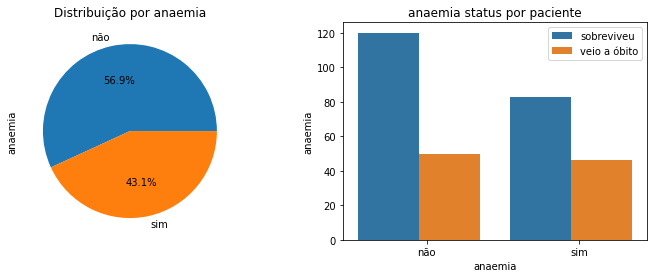

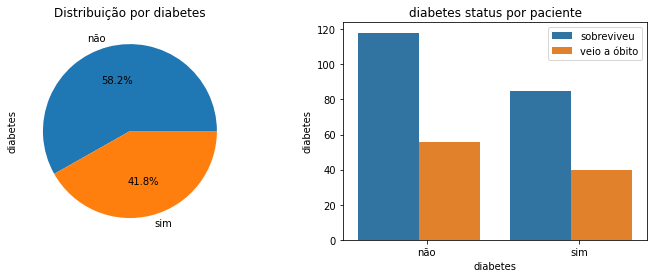

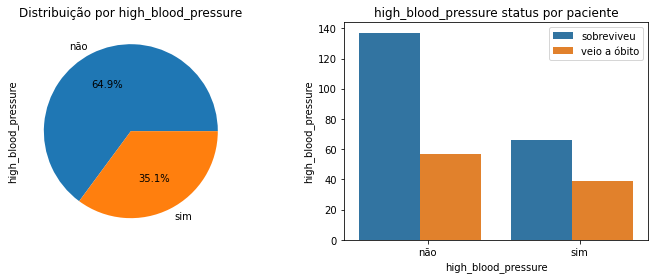

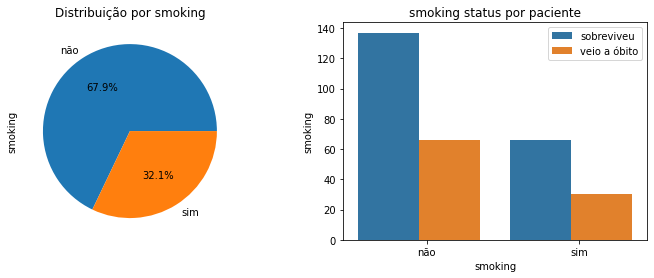

In [ ]:
# explorando as distribuições de anemia, diabetes, pressão alta e tabagismo
conditions = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

for condition in conditions:
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
    
    plt.subplot(1, 2, 1)
    df[condition].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = ['não', 'sim'])
    plt.title('Distribuição por {}'.format(condition))

    plt.subplot(1, 2, 2)
    condition_plot = sns.countplot(condition, hue = 'DEATH_EVENT', data = df)
    condition_plot.set(title = "{} status por paciente".format(condition), 
                       ylabel = '{}'.format(condition))
    plt.xticks(ticks = [0.05, 1.05], labels = ['não', 'sim'])
    plt.legend(labels = ['sobreviveu', 'veio a óbito'])

    plt.show()

Para as variáveis ​​de 'anaemia', 'diabetes', 'high_blood_pressure' e 'smoking', vemos que a maioria dos pacientes relatou 'não' sobre eles. Conseqüentemente, o número de pacientes que sobreviveram e morreram é menor para aqueles que relataram 'sim' do que para aqueles que relataram 'não'.

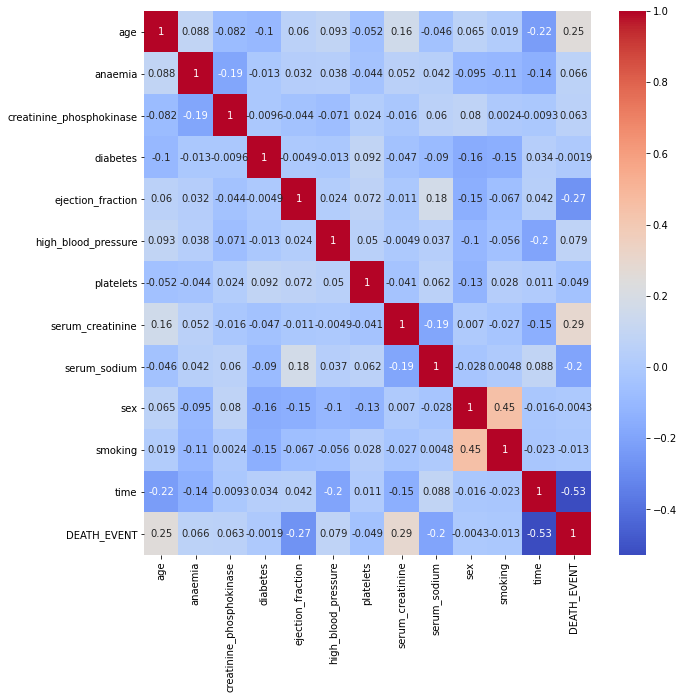

In [ ]:
# prevendo as correlações entre as variáveis
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

As variáveis 'sex' e 'smoking' parecem estar moderadamente positivamente correlacionadas entre si, enquanto 'time' e 'DEATH_EVENT' são negativamente correlacionados entre si.


Para verificar a distribuição do conjunto de dados, traçaremos o gráfico de densidade de cada recurso.

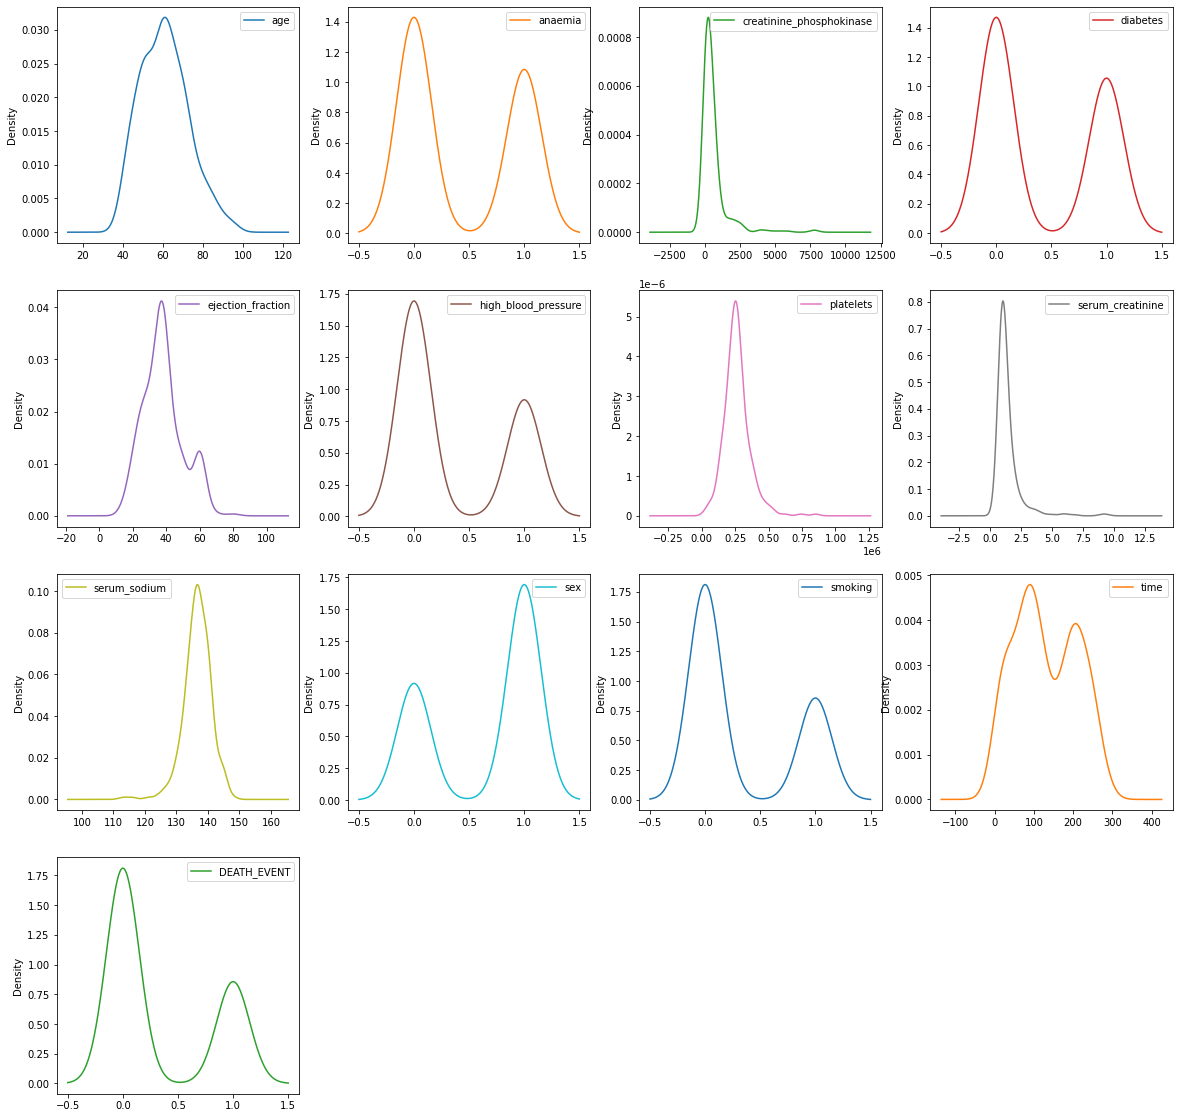

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

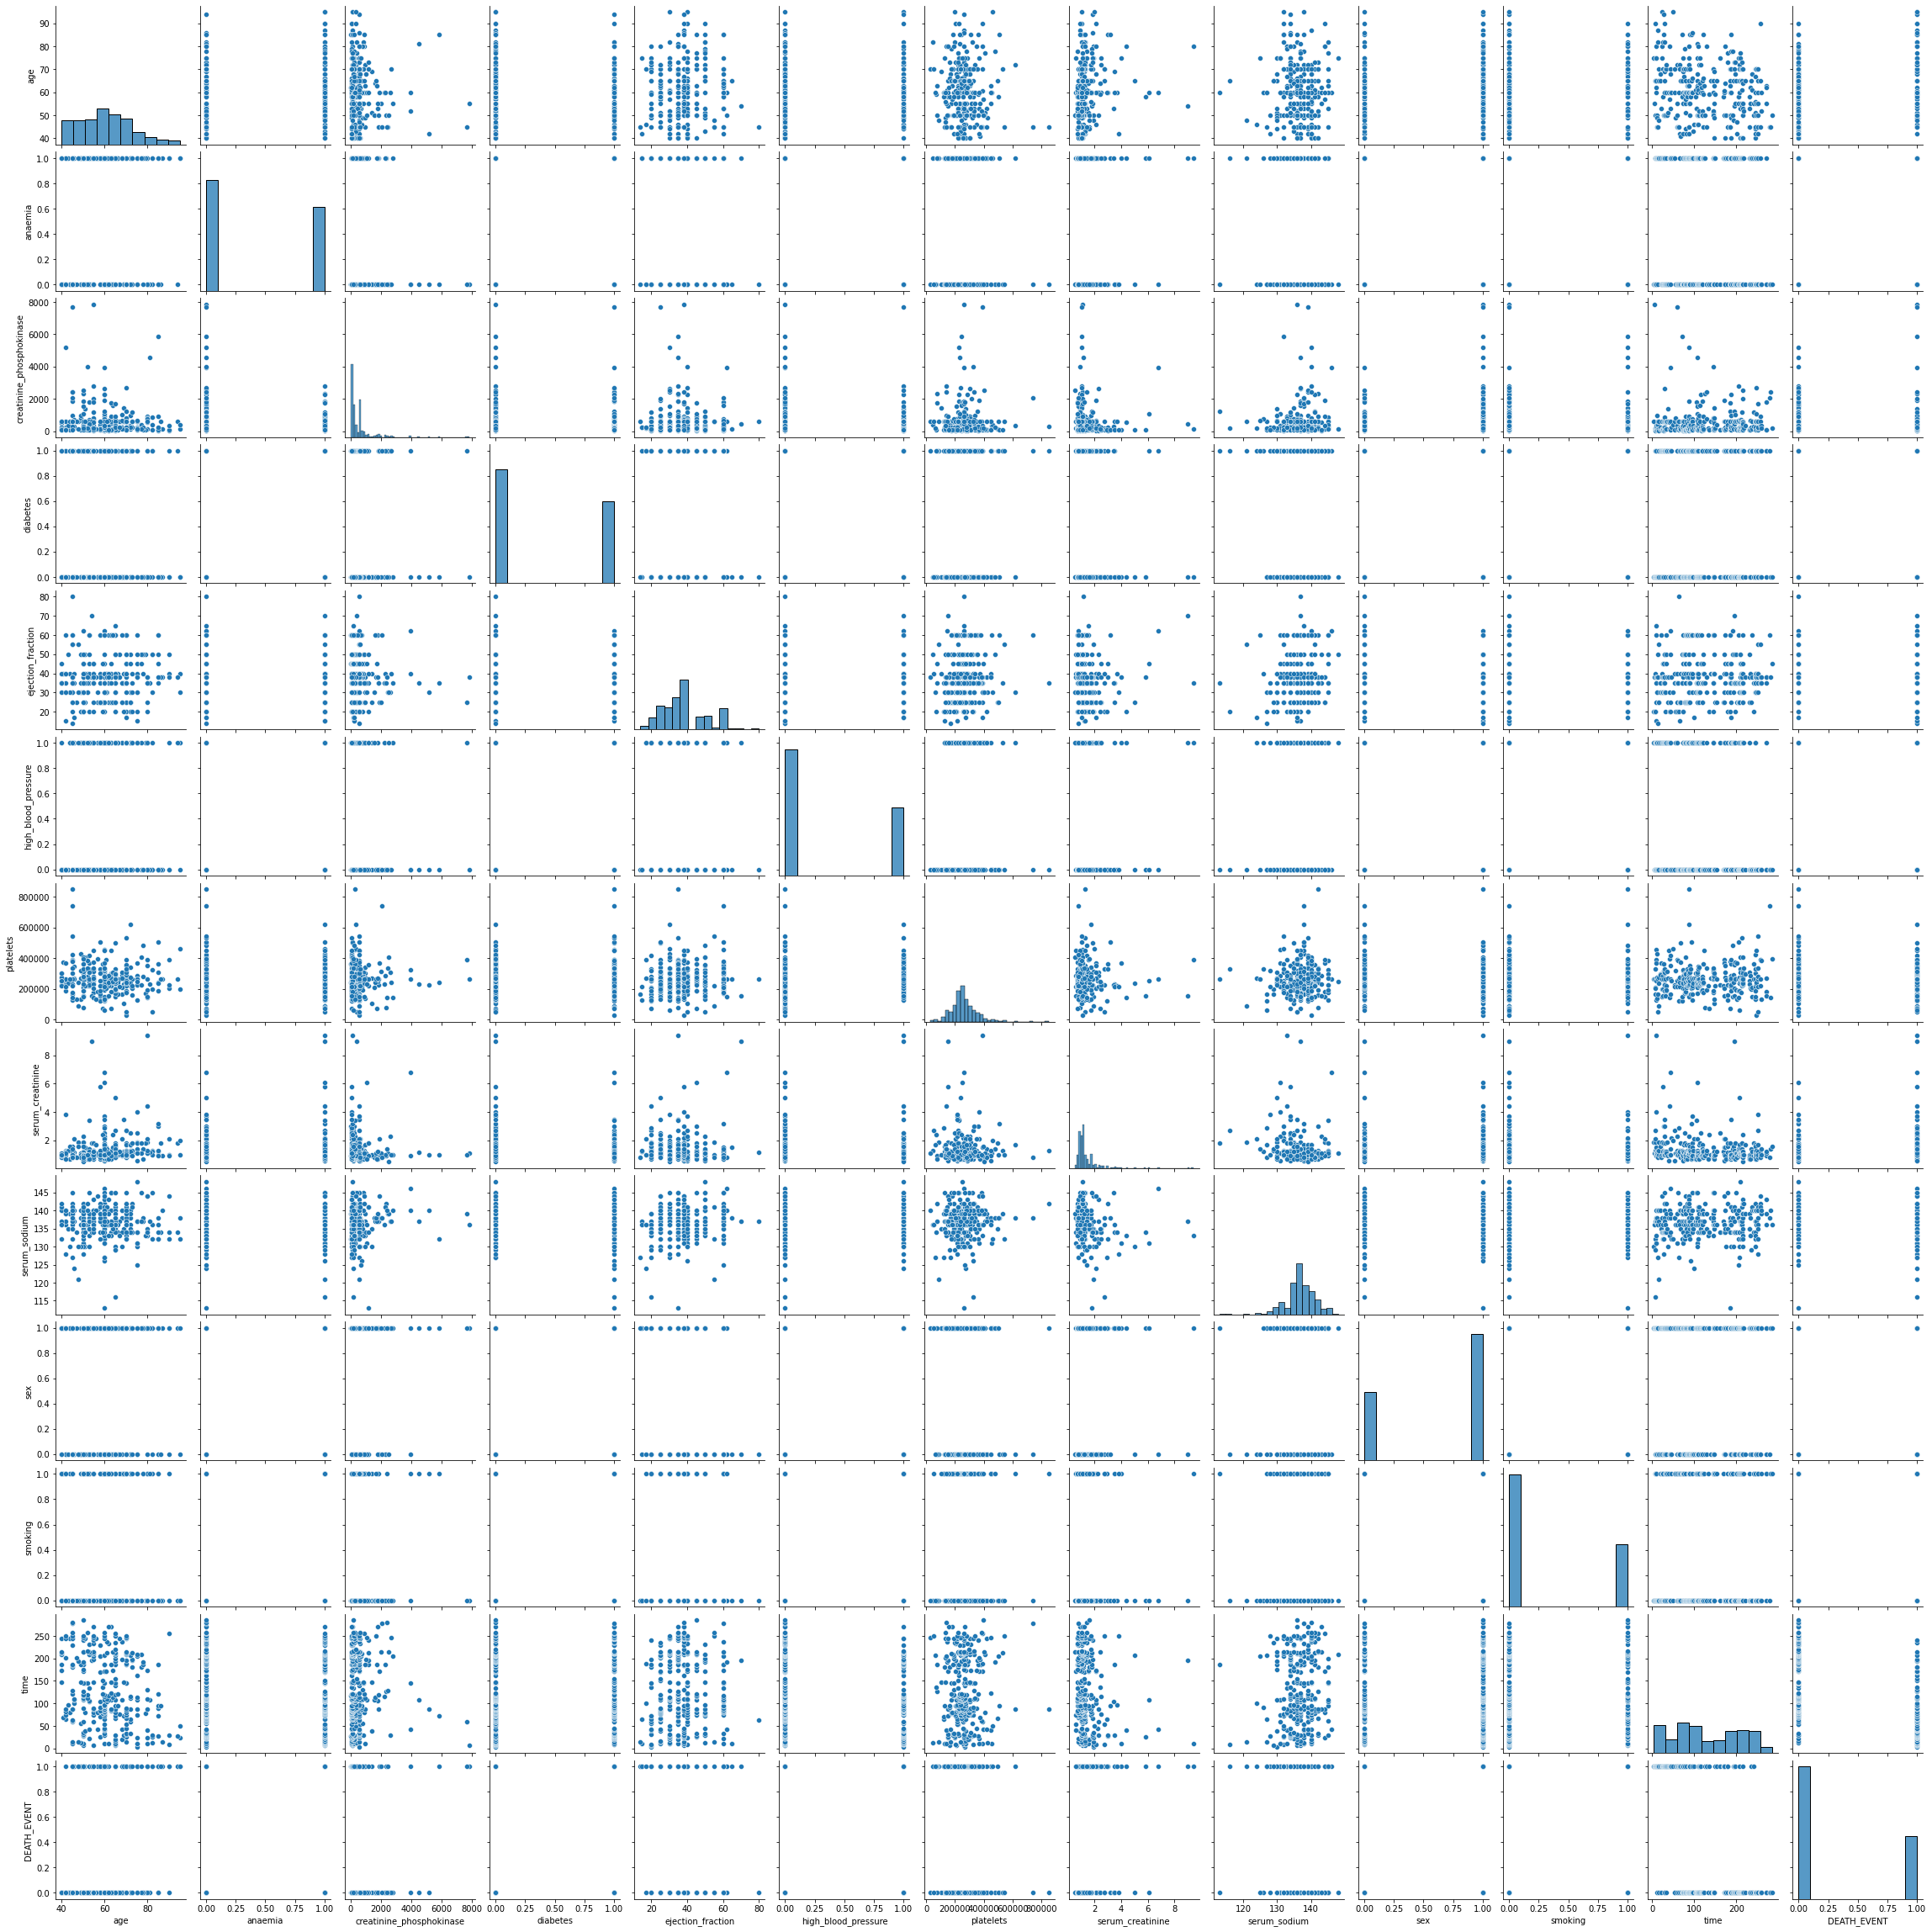

In [ ]:
# verificando a linearidade
sns.pairplot(df, kind = 'scatter')
plt.show()

Não parece haver uma relação específica entre as variáveis, muito menos linear, **portanto a regressão logística está fora de questão.**

# Modelagem de dados
Existem vários algoritmos de aprendizado de máquina que podemos usar. Visto que nossa variável-alvo consiste em dois valores discretos (0 - não morreu, 1 - morreu), nossa tarefa se enquadra na classificação. Tentaremos os seguintes algoritmos de classificação básicos como estão, ou seja, sem otimizá-los:


1.   Naive Bayes classification
2.   K-Nearest Neighbors classification
3.   Random Forest classification
4.   Support Vector Machine classification


# Pré-processamento de dados
Aqui, separaremos nossa variável de destino dos recursos e também escalonaremos as variáveis ​​independentes. Também dividiremos o conjunto de dados em 80% do conjunto de treinamento e 20% do conjunto de teste.

In [ ]:
# embaralhando nosso conjunto de dados
df = df.sample(frac = 1)

# separando dados de recursos e classes - alvo
X = df.drop(columns = ['DEATH_EVENT']).values
y = df.DEATH_EVENT.values

In [ ]:
# dividindo os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, stratify = df['DEATH_EVENT'])

In [ ]:
# dimensionando nossos recursos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelagem

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# K-Nearest Neightbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Avaliação de modelo

Avaliaremos o desempenho do modelo usando o relatório de classificação e a matriz de confusão.

Mostrando resultados para Gaussian Naive Bayes Classifier
MATRIZ DE CONFUSÃO: 



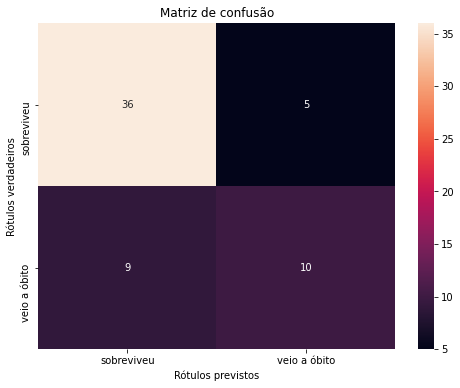

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.67      0.53      0.59        19

    accuracy                           0.77        60
   macro avg       0.73      0.70      0.71        60
weighted avg       0.76      0.77      0.76        60

---------------------------------------------------------------------------
Mostrando resultados para K-Nearest Neighbors Classifier
MATRIZ DE CONFUSÃO: 



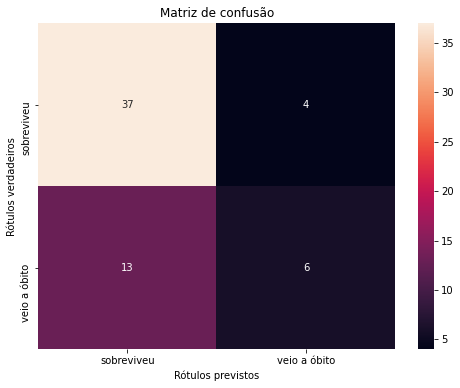

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        41
           1       0.60      0.32      0.41        19

    accuracy                           0.72        60
   macro avg       0.67      0.61      0.61        60
weighted avg       0.70      0.72      0.69        60

---------------------------------------------------------------------------
Mostrando resultados para Random Forest Classifier
MATRIZ DE CONFUSÃO: 



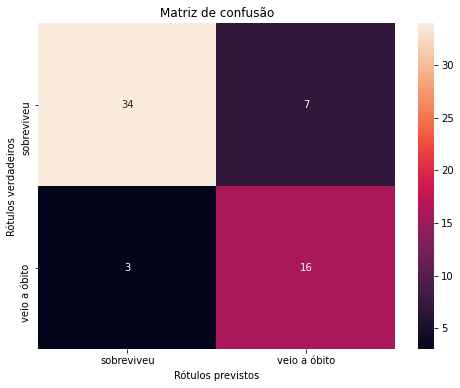

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.70      0.84      0.76        19

    accuracy                           0.83        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.85      0.83      0.84        60

---------------------------------------------------------------------------
Mostrando resultados para Support Vector Machine Classifier
MATRIZ DE CONFUSÃO: 



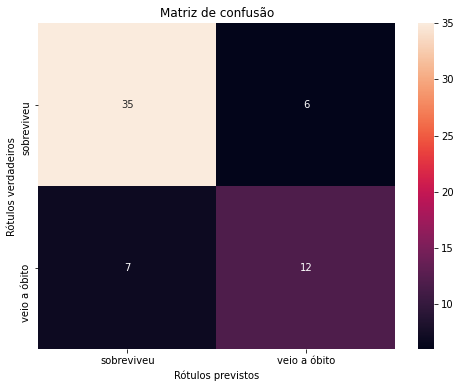

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60

---------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

classifiers = ['Gaussian Naive Bayes Classifier', 'K-Nearest Neighbors Classifier',
               'Random Forest Classifier', 'Support Vector Machine Classifier']
predictions = [nb_pred, knn_pred, rf_pred, svc_pred]

for classifier, prediction in zip(classifiers, predictions):
    print("Mostrando resultados para {}".format(classifier))
    print("MATRIZ DE CONFUSÃO: \n")
    #print("Matriz de Confusão:\n", confusion_matrix(y_test, prediction))
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, prediction), annot=True, ax = ax); #annot = True para anotar células
    # rótulos, título e subrótulos
    ax.set_xlabel('Rótulos previstos');ax.set_ylabel('Rótulos verdadeiros'); 
    ax.set_title('Matriz de confusão'); 
    ax.xaxis.set_ticklabels(['sobreviveu', 'veio a óbito']); ax.yaxis.set_ticklabels(['sobreviveu', 'veio a óbito']);
    plt.show()
    print("Relatório de classificação:\n", classification_report(y_test, prediction))
    print('-' * 75)

# CONCLUSÃO

Vemos que o Random Forest Classifier superou os outros classificadores em termos de precisão, seguido pelo Support Vector Machine Classifier. O Random Forest Classifier também teve um desempenho extremamente bom em precisão e recall.

No entanto, não devemos nos precipitar em concluir que esse modelo é perfeito. Ainda devemos otimizar os hiperparâmetros, bem como obter uma compreensão mais profunda e detalhada das variáveis ​​independentes e como exatamente elas contribuem para as doenças cardiovasculares. Além disso, ainda existem muitos outros algoritmos que provavelmente poderiam fazer um trabalho melhor, como redes neurais, portanto, eles devem ser examinados.